In [90]:
import os
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier


import numpy as np # linear algebra
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from pandas.plotting import scatter_matrix

In [40]:
def load_titanic_train_preprocessed():
    train_preprocessed = pd.read_csv(os.path.join('data', 'train_preprocessed.csv'))
    train_preprocessed_features = train_preprocessed.drop('Survived', axis=1)
    train_preprocessed_label = train_preprocessed['Survived']
    return train_preprocessed_features, train_preprocessed_label

In [42]:
def load_titanic_train_test_preprocessed():
    train_test_preprocessed = pd.read_csv(os.path.join('data', 'train_test_preprocessed.csv'))
    train_test_preprocessed_features = train_test_preprocessed.drop('Survived', axis=1)
    train_test_preprocessed_label = train_test_preprocessed['Survived']
    return train_test_preprocessed_features, train_test_preprocessed_label

In [43]:
X_train, y_train = load_titanic_train_preprocessed()
X_test, y_test = load_titanic_train_test_preprocessed()

# Train the model

## LogisticRegression

In [80]:
lr_model = LogisticRegression(max_iter=1000, penalty=None)
lr_model.fit(X_train, y_train)
print("The score of our model is ", lr_model.score(X_train, y_train))

The score of our model is  0.7963483146067416


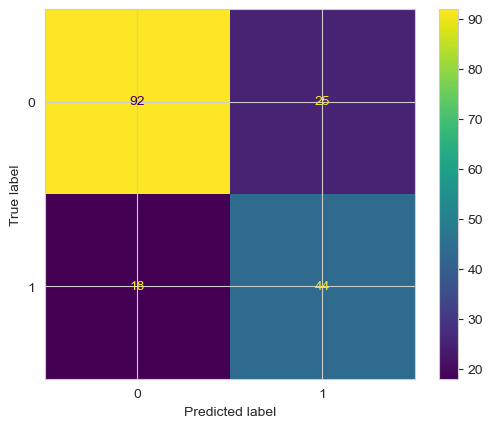

The precision score is  0.6376811594202898
The recall score is  0.7096774193548387
The f1 score is  0.6717557251908397


In [83]:
final_predictions = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, final_predictions)
plt.show()
print("The precision score is ", precision_score(y_test, final_predictions))
print("The recall score is ", recall_score(y_test, final_predictions))
print("The f1 score is ", f1_score(y_test, final_predictions))

## SGDClassifier

In [84]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
print("The score of our model is ", sgd_model.score(X_train, y_train))

The score of our model is  0.6587078651685393


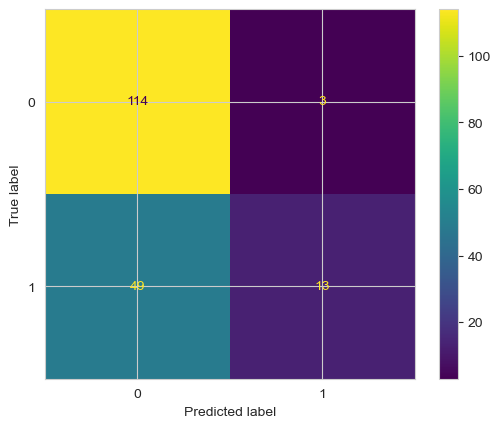

The precision score is  0.8125
The recall score is  0.20967741935483872
The f1 score is  0.33333333333333337


In [85]:
final_predictions = sgd_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, final_predictions)
plt.show()
print("The precision score is ", precision_score(y_test, final_predictions))
print("The recall score is ", recall_score(y_test, final_predictions))
print("The f1 score is ", f1_score(y_test, final_predictions))

## Decision Tree

In [86]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=2)
dt_model.fit(X_train, y_train)
print("The score of our model is ", dt_model.score(X_train, y_train))

The score of our model is  0.8019662921348315


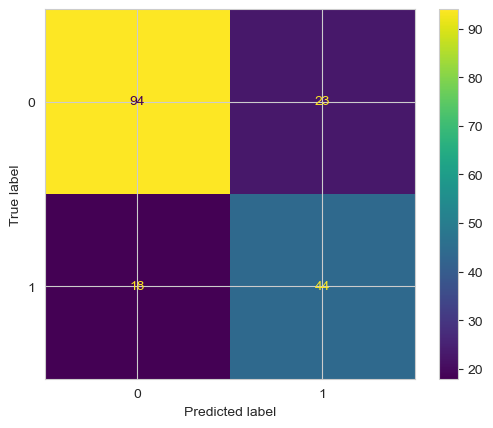

The precision score is  0.6567164179104478
The recall score is  0.7096774193548387
The f1 score is  0.682170542635659


In [87]:
final_predictions = dt_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, final_predictions)
plt.show()
print("The precision score is ", precision_score(y_test, final_predictions))
print("The recall score is ", recall_score(y_test, final_predictions))
print("The f1 score is ", f1_score(y_test, final_predictions))

# Ensemble learning technique

## Stacking

In [94]:
base_estimators = [
    ('lr', lr_model),
    ('sgd', sgd_model),
    ('dt', dt_model)
]

ensemble_model = StackingClassifier(estimators=base_estimators)
ensemble_model.fit(X_train, y_train)
print("The score of our model is ", ensemble_model.score(X_train, y_train))

The score of our model is  0.8061797752808989


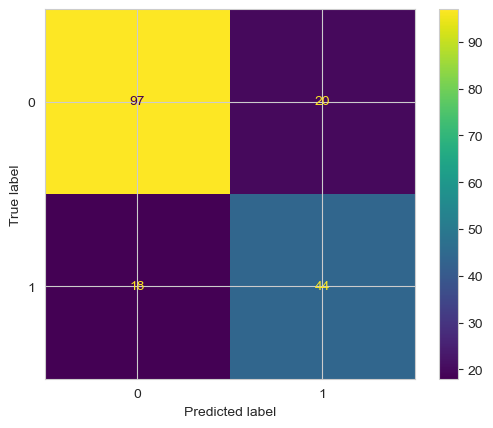

The precision score is  0.6875
The recall score is  0.7096774193548387
The f1 score is  0.6984126984126984


In [95]:
final_predictions = ensemble_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, final_predictions)
plt.show()
print("The precision score is ", precision_score(y_test, final_predictions))
print("The recall score is ", recall_score(y_test, final_predictions))
print("The f1 score is ", f1_score(y_test, final_predictions))

# Create result for Kaggle

In [96]:
def load_titanic_test_preprocessed():
    test_preprocessed = pd.read_csv(os.path.join('data', 'test_preprocessed.csv'))
    test_preprocessed_features = test_preprocessed.drop('PassengerId', axis=1)
    test_preprocessed_label = test_preprocessed['PassengerId']
    return test_preprocessed_features, test_preprocessed_label

X_final, x_final_passenger_id = load_titanic_test_preprocessed()

y_final = ensemble_model.predict(X_final)

df_final = pd.DataFrame(x_final_passenger_id)
df_final["Survived"] = y_final

filepath = Path('result.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_final.to_csv(filepath, index=False)